In [1]:
import pandas as pd
import numpy as np

Veri seti https://finance.yahoo.com/quote/CSV/history/ linki uzerinden 1 yillik veriler olarak alinmistir. burada Carriage Services, Inc. (CSV) sirketnin verileri listelenmektedir. Doysa adi 'CSV' olarak download edilmektedir.

In [2]:
stocks_df = pd.read_csv('CSV.csv')

stocks_df.head(-5)

Date       Open       High        Low      Close  Adj Close  Volume
0    2023-03-31  29.940001  30.540001  29.840000  30.520000  29.997280  130400
1    2023-04-03  30.480000  30.889999  29.900000  30.139999  29.623787  104400
2    2023-04-04  30.240000  30.240000  28.780001  29.090000  28.591768   84900
3    2023-04-05  29.090000  29.299999  28.290001  28.440001  27.952904  110500
4    2023-04-06  28.420000  28.680000  27.900000  28.590000  28.100334  128100
..          ...        ...        ...        ...        ...        ...     ...
240  2024-03-15  25.129999  25.830000  25.129999  25.580000  25.580000  185500
241  2024-03-18  25.520000  25.570000  25.150000  25.450001  25.450001   67700
242  2024-03-19  25.450001  26.010000  25.450001  25.980000  25.980000   72900
243  2024-03-20  25.980000  26.590000  25.780001  26.580000  26.580000  163600
244  2024-03-21  26.900000  27.059999  26.709999  26.799999  26.799999  130800

[245 rows x 7 columns]

In [3]:
stocks_df.shape

(250, 7)

In [4]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [5]:
stocks_df.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    27.082400   27.468320   26.672280   27.048360   26.812542   
std      3.374653    3.375908    3.394846    3.351591    3.243357   
min     20.660000   21.280001   18.059999   20.150000   20.059715   
25%     24.660000   25.069999   24.322500   24.685000   24.544531   
50%     26.685001   27.185001   26.370000   26.665000   26.516258   
75%     29.930001   30.197499   29.360001   29.652501   29.242414   
max     34.450001   35.590000   33.860001   34.189999   33.747028   

              Volume  
count     250.000000  
mean    96384.000000  
std     62923.580731  
min     24700.000000  
25%     62150.000000  
50%     82600.000000  
75%    110225.000000  
max    582600.000000

1 yillik gunluk olarak verilen acilis ve kapanis verileri gorsellestirelim.

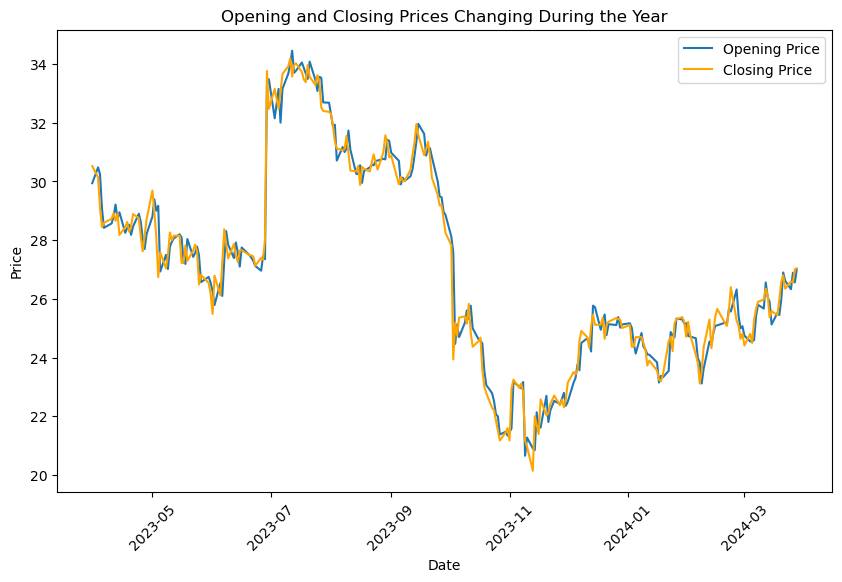

In [6]:
import matplotlib.pyplot as plt

# Veri setini yükleme (örnek olarak veri seti adı 'df' olarak kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Date' sütununu datetime formatına çevirme
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# 'Date' sütununu indeks olarak ayarlama
stocks_df.set_index('Date', inplace=True)

# Yıl içindeki değişen açılış ve kapanış fiyatlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(stocks_df['Open'], label='Opening Price')
plt.plot(stocks_df['Close'], label='Closing Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Opening and Closing Prices Changing During the Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

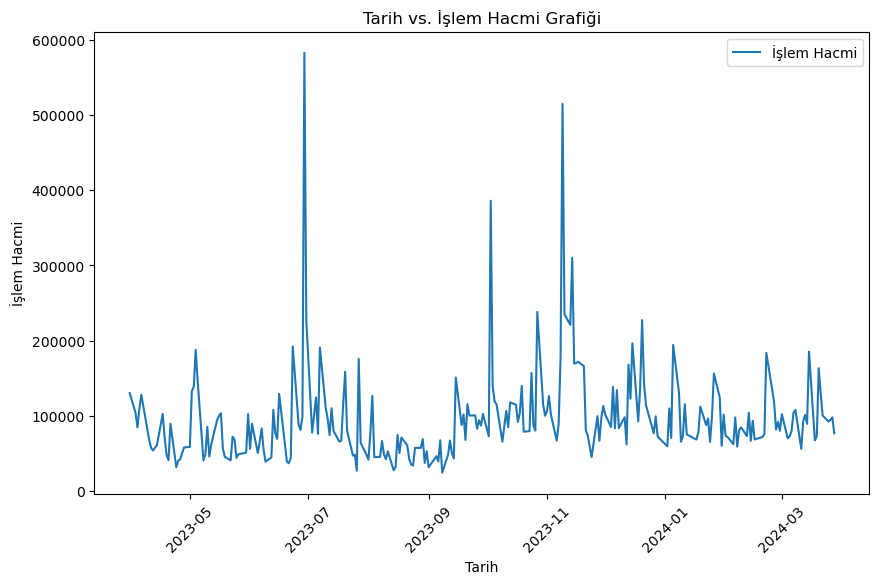

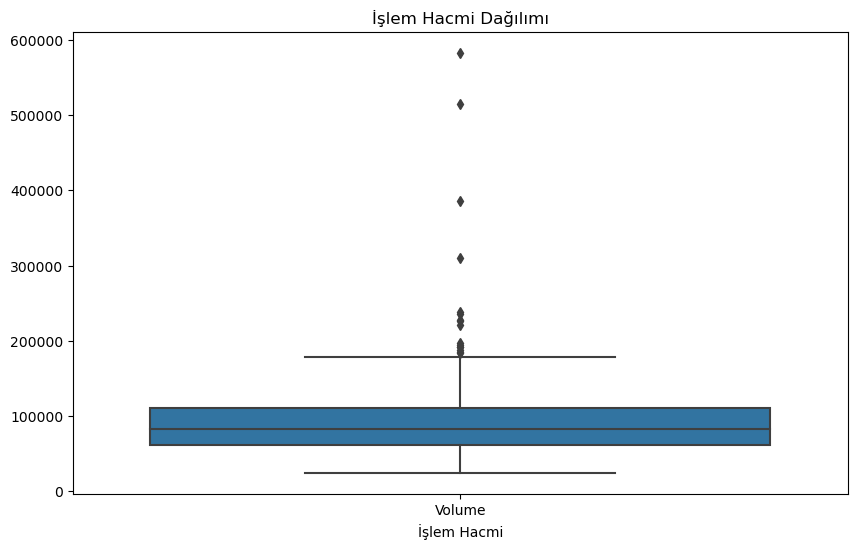

In [19]:
# Hacimdeki değişimleri gösteren grafik
plt.figure(figsize=(10, 6))
plt.plot(stocks_df.index, stocks_df['Volume'], label='İşlem Hacmi')
plt.xlabel('Tarih')
plt.ylabel('İşlem Hacmi')
plt.title('Tarih vs. İşlem Hacmi Grafiği')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Hacimdeki anormallikler
plt.figure(figsize=(10, 6))
sns.boxplot(data=stocks_df[['Volume']])
plt.xlabel('İşlem Hacmi')
plt.title('İşlem Hacmi Dağılımı')
plt.show()


# Clusterin Methods

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


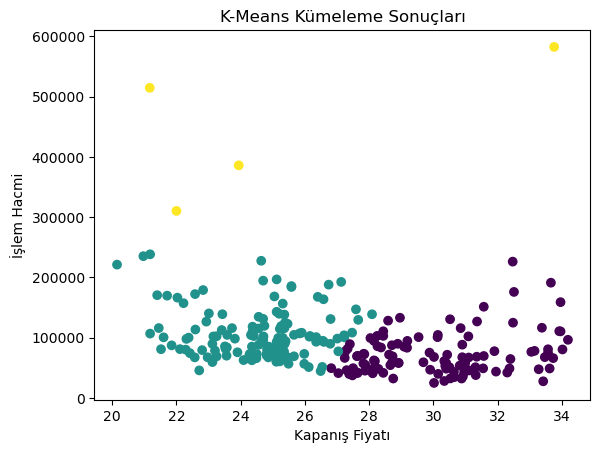

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Verileri ön işleme: Eksik değerleri doldurma, ölçeklendirme vb.
# Örnek olarak, veri setindeki 'Close' ve 'Volume' sütunlarını kullanalım
data = stocks_df[['Close', 'Volume']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means kümeleme uygulama
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Küme merkezlerini görselleştirme
plt.scatter(data['Close'], data['Volume'], c=cluster_labels, cmap='viridis')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('İşlem Hacmi')
plt.title('K-Means Kümeleme Sonuçları')
plt.show()


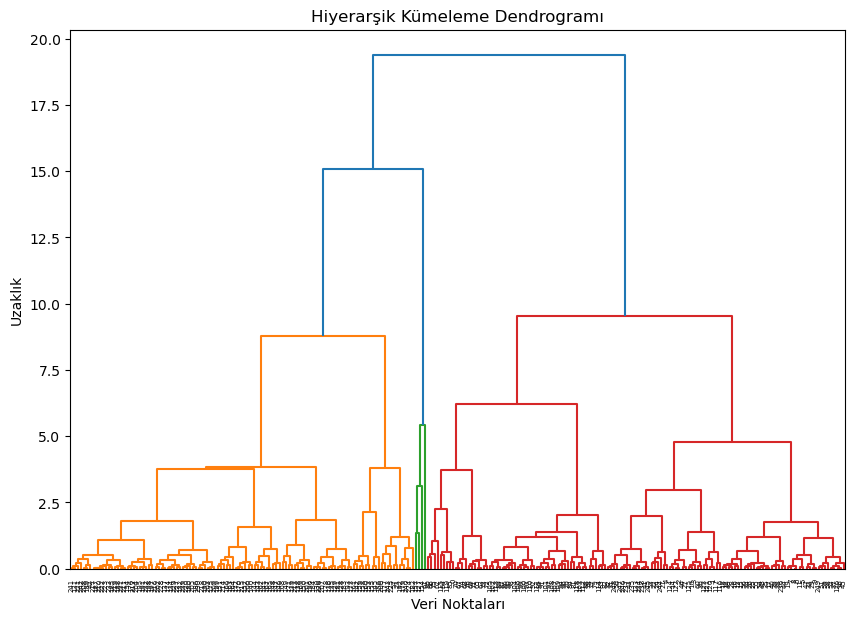

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme uygulama
linked = linkage(scaled_data, method='ward')

# Dendrogramı görselleştirme
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hiyerarşik Kümeleme Dendrogramı')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklık')
plt.show()


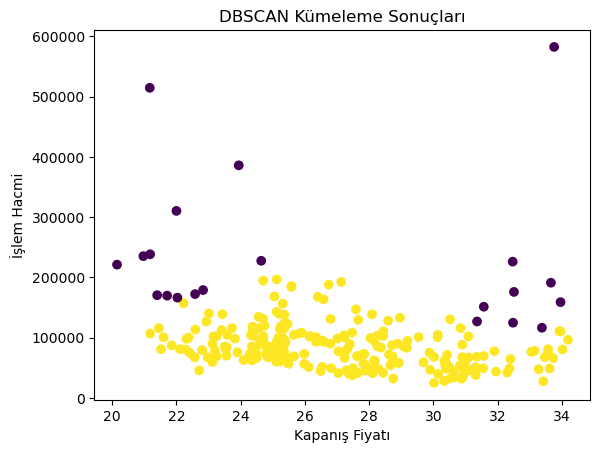

In [26]:
from sklearn.cluster import DBSCAN

# DBSCAN kümeleme uygulama
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(scaled_data)
cluster_labels_dbscan = dbscan.labels_

# DBSCAN sonuçlarını görselleştirme
plt.scatter(data['Close'], data['Volume'], c=cluster_labels_dbscan, cmap='viridis')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('İşlem Hacmi')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.show()


C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


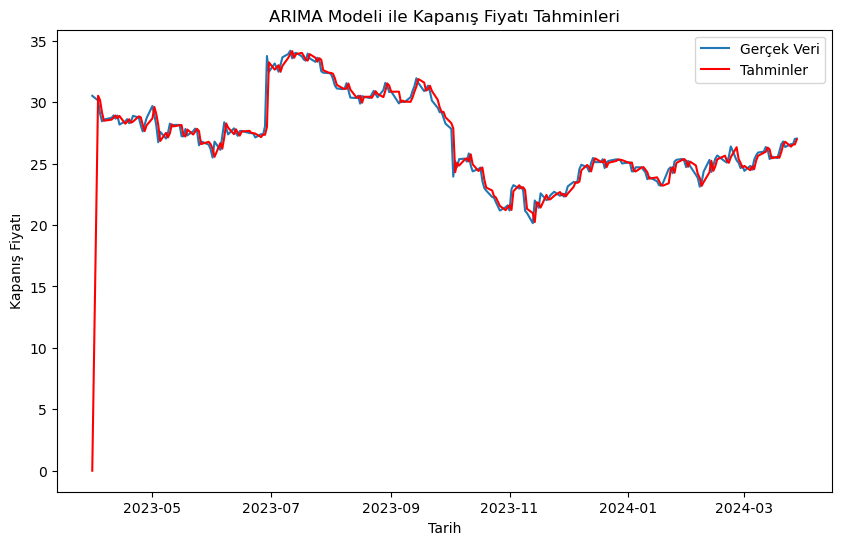

Ortalama Kare Hata (MSE): 4.198947082616285


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Veri setini yükleme (örnek olarak 'df' adıyla kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Close' sütununu zaman serisi olarak ayarlama
ts = stocks_df['Close'].dropna()

# ARIMA modeli uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Model sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Tahminler')
plt.title('ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Modelin performansını değerlendirme
mse = mean_squared_error(ts, results.fittedvalues)
print(f"Ortalama Kare Hata (MSE): {mse}")


C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

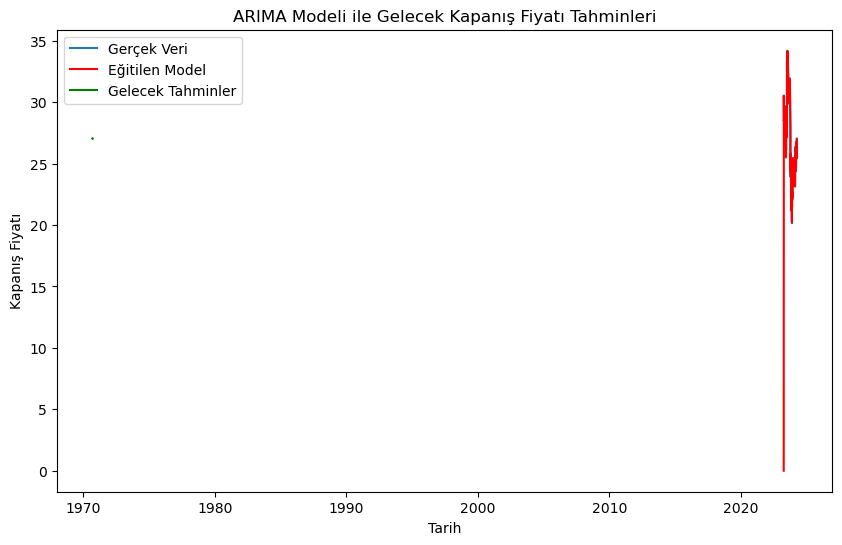

Gelecek Kapanış Fiyatı Tahminleri:
250    27.042628
251    27.037684
252    27.031752
253    27.028564
254    27.028577
255    27.028639
256    27.028779
257    27.028855
258    27.028872
259    27.028869
Name: predicted_mean, dtype: float64


In [32]:
# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek zaman dilimleri için tahmin yapma
forecast_steps = 10  # Örnek olarak, 10 adet gelecek zaman dilimi için tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('ARIMA Modeli ile Gelecek Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek Kapanış Fiyatı Tahminleri:")
print(forecast)

C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\sertacbattal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


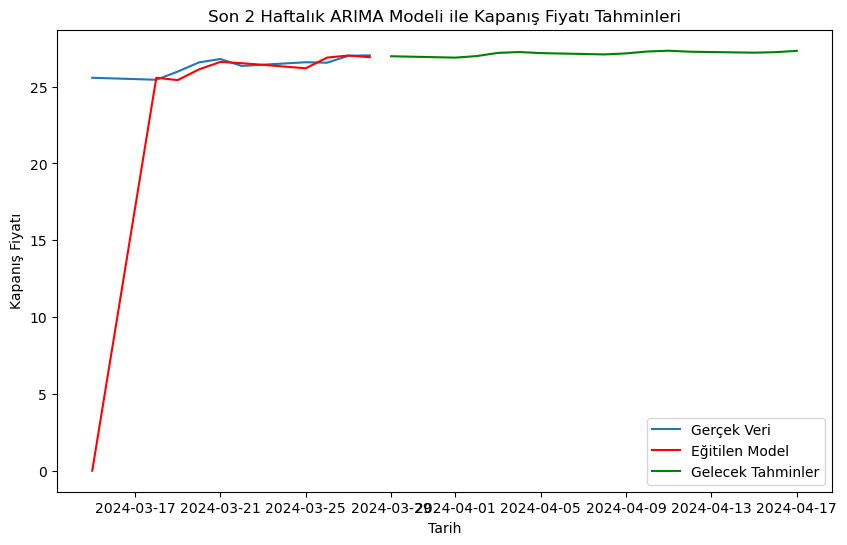

Gelecek 2 Haftalık Kapanış Fiyatı Tahminleri:
2024-03-29    26.980648
2024-04-01    26.890496
2024-04-02    26.990393
2024-04-03    27.198443
2024-04-04    27.254665
2024-04-05    27.185517
2024-04-08    27.099543
2024-04-09    27.165730
2024-04-10    27.290137
2024-04-11    27.340269
2024-04-12    27.276039
2024-04-15    27.212664
2024-04-16    27.245974
2024-04-17    27.332463
Freq: B, Name: predicted_mean, dtype: float64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükleme ve zaman serisi olarak ayarlama
# Örnek olarak, son 2 haftalık veriyi alalım (varsayılan olarak, son 14 günlük veriyi kullanacağız)
end_date = stocks_df.index[-1]  # Veri setindeki en son tarih
start_date = end_date - pd.DateOffset(days=13)  # Son 2 haftalık dönemi belirleme
ts = stocks_df.loc[start_date:end_date, 'Close']  # Kapanış fiyatlarını zaman serisi olarak alır

# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek 2 haftalık dönem için tahmin yapma
forecast_steps = 14  # Gelecek 2 hafta için 14 günlük tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('Son 2 Haftalık ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek 2 Haftalık Kapanış Fiyatı Tahminleri:")
print(forecast)
